Mini projet : Nettoyage, Transformation et Déploiement d’un Modèle de Prédiction des Commandes en Retard (partie 1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


# Partie 1 : Prétraitement des Données

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(f"Dimensions du dataset d'entraînement: {train_df.shape}")
print(f"Dimensions du dataset de test: {test_df.shape}")


Dimensions du dataset d'entraînement: (1460, 81)
Dimensions du dataset de test: (1459, 80)


In [6]:
print("Types des variables dans le dataset d'entraînement:")
print(train_df.dtypes.value_counts()) 
print("\nAperçu des types des colonnes:")
print(train_df.dtypes)  


Types des variables dans le dataset d'entraînement:
object     43
int64      35
float64     3
Name: count, dtype: int64

Aperçu des types des colonnes:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [7]:
# Vérifier le nombre et le pourcentage de valeurs manquantes dans chaque colonne
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_values




Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
missing_data = pd.DataFrame({
    "Nombre de valeurs manquantes": missing_values,
    "Pourcentage de valeurs manquantes (%)": missing_percentage
})
missing_data = missing_data[missing_data["Nombre de valeurs manquantes"] > 0]
missing_data.sort_values(by="Pourcentage de valeurs manquantes (%)", ascending=False, inplace=True)
missing_data


,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes (%)
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


Supprimer les colonnes où plus de 50% des valeurs sont manquantes

In [9]:

seuil = 0.5
cols_to_drop = train_df.columns[train_df.isnull().mean() > seuil]
train_df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True)

print(f"Colonnes supprimées : {list(cols_to_drop)}")



Colonnes supprimées : ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


les colonnes de moins de 10% des valeurs sont manquantes

In [10]:
# Identify columns with less than 10% missing values
cols_less_than_10_percent_missing = train_df.columns[train_df.isnull().mean() < 0.1]

# Create an imputer for numerical and categorical data
numerical_cols = train_df[cols_less_than_10_percent_missing].select_dtypes(include=['float64', 'int64']).columns
categorical_cols = train_df[cols_less_than_10_percent_missing].select_dtypes(include=['object']).columns

# Impute numerical columns with the median
numerical_imputer = SimpleImputer(strategy='median')
train_df[numerical_cols] = numerical_imputer.fit_transform(train_df[numerical_cols])

# Impute categorical columns with the most frequent value (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_df[categorical_cols] = categorical_imputer.fit_transform(train_df[categorical_cols])

# Check if any missing values remain
missing_data_after_imputation = train_df.isnull().sum().sort_values(ascending=False)
print(missing_data_after_imputation.head())

 

FireplaceQu    690
LotFrontage    259
MSSubClass       0
Id               0
LotArea          0
dtype: int64


Les colonnes qui nécéssitent une analyse de distribution

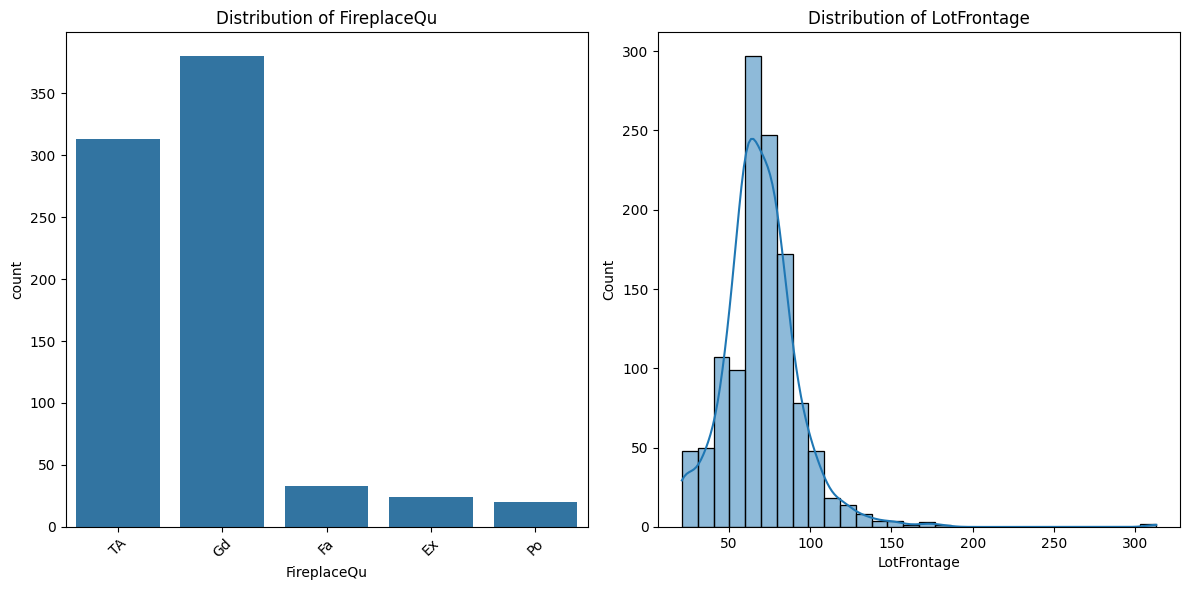

In [11]:
plt.figure(figsize=(12, 6))

# Plot for 'FireplaceQu' (categorical column)
plt.subplot(1, 2, 1)
sns.countplot(x='FireplaceQu', data=train_df)
plt.title('Distribution of FireplaceQu')
plt.xticks(rotation=45)

# Plot for 'LotFrontage' (numerical column)
plt.subplot(1, 2, 2)
sns.histplot(train_df['LotFrontage'], kde=True, bins=30)
plt.title('Distribution of LotFrontage')

# Display the plots
plt.tight_layout()
plt.show()

In [12]:
# Impute for LotFrontage (Numerical column with normal distribution)
lotfrontage_imputer = SimpleImputer(strategy='median')  
train_df['LotFrontage'] = lotfrontage_imputer.fit_transform(train_df[['LotFrontage']])

# Impute for FireplaceQu (Categorical column with imbalanced distribution)
fireplacequ_imputer = SimpleImputer(strategy='most_frequent')  # Fill with the most frequent category (mode)
train_df['FireplaceQu'] = fireplacequ_imputer.fit_transform(train_df[['FireplaceQu']]).ravel()


# Check the missing values again to confirm the imputation
missing_values_after = train_df.isnull().sum()
print(missing_values_after)


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64


### Partie 2 : Sélection des Variables Pertinentes

#### Étape 3 : Analyse de corrélation

In [13]:
from scipy.stats import chi2_contingency

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency

numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_df[numeric_cols].corr()

# Afficher les paires de variables fortement corrélées (> 90%)
high_corr_pairs = []
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.9:
            high_corr_pairs.append((col1, col2, corr_matrix.loc[col1, col2]))

print("Paires de variables fortement corrélées (> 90%):")
print(high_corr_pairs)

# 2. Test de Khi-deux pour les variables catégorielles
categorical_cols = train_df.select_dtypes(include=['object']).columns
chi2_results = {}

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            # Créer le tableau de contingence
            contingency_table = pd.crosstab(train_df[col1], train_df[col2])
            # Appliquer le test de Khi-deux
            chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
            chi2_results[(col1, col2)] = p_value

# Afficher les paires de variables catégorielles dépendantes (p-value < 0.05)
dependent_categorical_vars = [(col1, col2) for (col1, col2), p in chi2_results.items() if p < 0.05]
print("Paires de variables catégorielles dépendantes (p-value < 0.05):")
print(dependent_categorical_vars)

# 3. Suppression des variables fortement corrélées (pour simplification, on élimine la première dans chaque paire)
cols_to_drop = [col1 for col1, col2, _ in high_corr_pairs]  # Supprimer les premières variables dans les paires
train_df.drop(columns=cols_to_drop, inplace=True)

# Nouvelle dimensionnalité
new_dimensionality = train_df.shape[1]
print(f"La nouvelle dimensionnalité de la base de données est : {new_dimensionality}")


Paires de variables fortement corrélées (> 90%):
[]
Paires de variables catégorielles dépendantes (p-value < 0.05):
[('MSZoning', 'Street'), ('MSZoning', 'LotShape'), ('MSZoning', 'LandContour'), ('MSZoning', 'LotConfig'), ('MSZoning', 'LandSlope'), ('MSZoning', 'Neighborhood'), ('MSZoning', 'Condition1'), ('MSZoning', 'Condition2'), ('MSZoning', 'BldgType'), ('MSZoning', 'HouseStyle'), ('MSZoning', 'RoofStyle'), ('MSZoning', 'Exterior1st'), ('MSZoning', 'Exterior2nd'), ('MSZoning', 'ExterQual'), ('MSZoning', 'ExterCond'), ('MSZoning', 'Foundation'), ('MSZoning', 'BsmtQual'), ('MSZoning', 'BsmtCond'), ('MSZoning', 'BsmtExposure'), ('MSZoning', 'BsmtFinType1'), ('MSZoning', 'Heating'), ('MSZoning', 'HeatingQC'), ('MSZoning', 'CentralAir'), ('MSZoning', 'Electrical'), ('MSZoning', 'KitchenQual'), ('MSZoning', 'FireplaceQu'), ('MSZoning', 'GarageType'), ('MSZoning', 'GarageFinish'), ('MSZoning', 'GarageQual'), ('MSZoning', 'GarageCond'), ('MSZoning', 'PavedDrive'), ('MSZoning', 'SaleType'

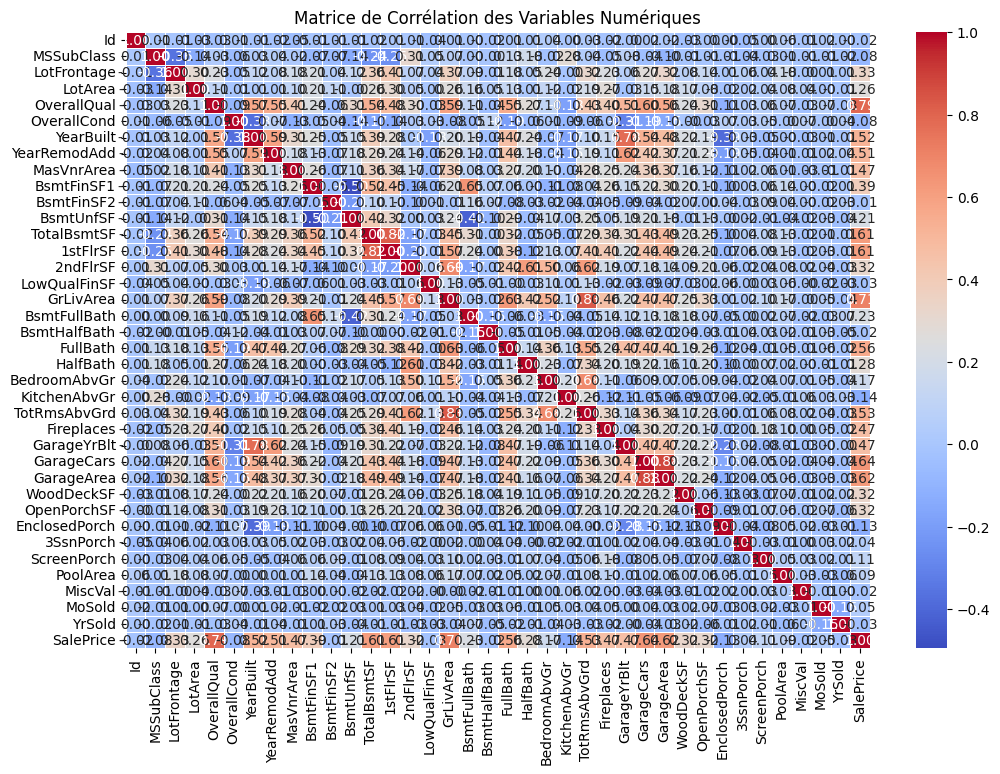

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation des Variables Numériques")
plt.show()

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sélectionner uniquement les colonnes numériques après nettoyage
numeric_data = train_df.select_dtypes(include=['float64', 'int64'])

# Normalisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Appliquer PCA pour conserver 95% de la variance expliquée
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

# Afficher la variance expliquée par chaque composante principale
print(f"Variance expliquée par chaque composante principale : {pca.explained_variance_ratio_}")
print(f"Nombre de composantes principales retenues : {pca.n_components_}")


Variance expliquée par chaque composante principale : [0.20776907 0.08437885 0.06774147 0.05333222 0.03926614 0.03144277
 0.03041241 0.02991703 0.02922462 0.02885901 0.02823815 0.02762583
 0.02676075 0.02632306 0.0251203  0.02384999 0.02295052 0.02180087
 0.02138417 0.02066863 0.01947444 0.01769116 0.01641676 0.01545228
 0.01411135 0.01132605 0.01056377]
Nombre de composantes principales retenues : 27


Au lieu d’utiliser toutes les variables initiales, nous pouvons travailler avec 27 dimensions tout en conservant l’essentiel des informations.
Cela permet d'améliorer la performance de certains modèles tout en réduisant la complexité des calculs.

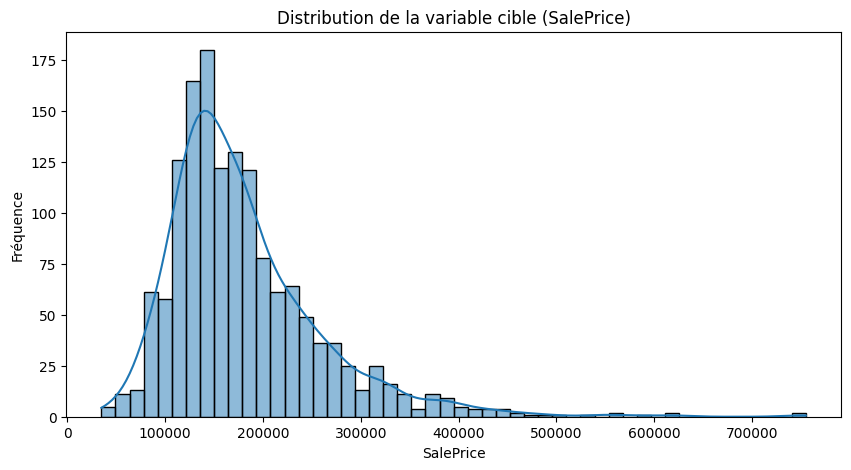

In [17]:

plt.figure(figsize=(10, 5))
sns.histplot(train_df["SalePrice"], bins=50, kde=True)
plt.xlabel("SalePrice")
plt.ylabel("Fréquence")
plt.title("Distribution de la variable cible (SalePrice)")
plt.show()

In [20]:
import pandas as pd

# Définir des plages de prix
bins = [0, 150000, 250000, 350000, float('inf')]
labels = ['bas', 'moyen', 'élevé', 'très élevé']

# Créer une nouvelle colonne catégorielle
train_df['PriceCategory'] = pd.cut(train_df['SalePrice'], bins=bins, labels=labels)

# Remplacer 'y' par la variable catégorielle
y = train_df['PriceCategory']
print(y.shape)

(1460,)


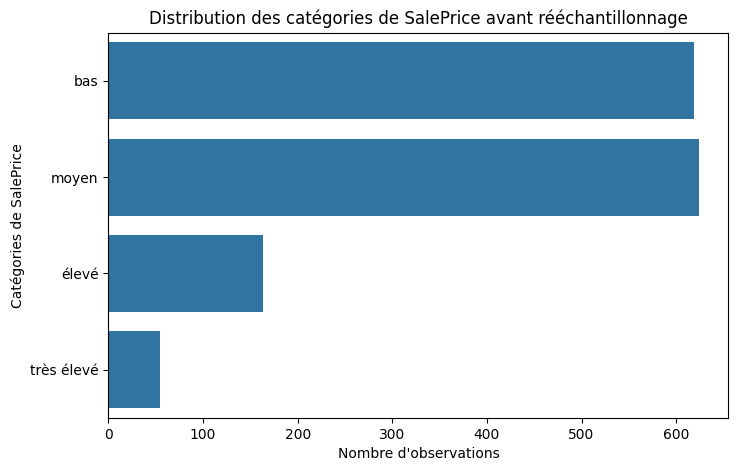

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(y=y)
plt.title("Distribution des catégories de SalePrice avant rééchantillonnage")
plt.xlabel("Nombre d'observations")
plt.ylabel("Catégories de SalePrice")
plt.show()

In [23]:
from imblearn.over_sampling import SMOTE

# X contient les caractéristiques d'entraînement
X = train_df.drop('SalePrice', axis=1)
X = pd.get_dummies(X)


# Application de SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribution après rééchantillonnage :", y_resampled.shape)


/home/anass_m/projet_devops/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Distribution après rééchantillonnage : (2496,)


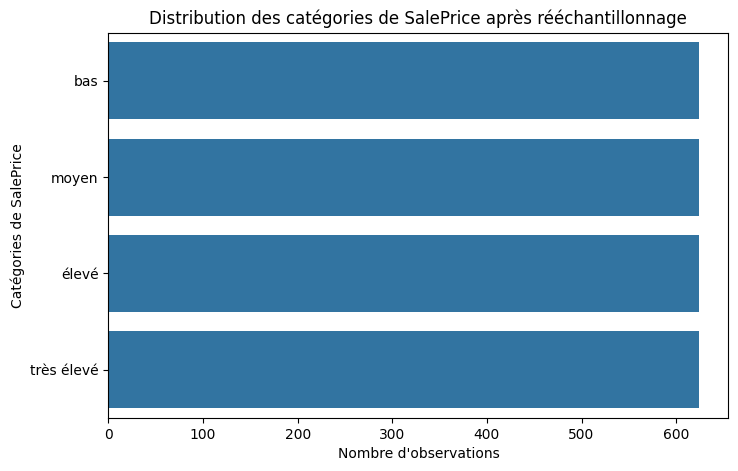

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(y=y_resampled)
plt.title("Distribution des catégories de SalePrice après rééchantillonnage")
plt.xlabel("Nombre d'observations")
plt.ylabel("Catégories de SalePrice")
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entraîner le modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_val)
print("Matrice de confusion :")
print(confusion_matrix(y_val, y_pred))

print("\nRapport de classification :")
print(classification_report(y_val, y_pred))


Matrice de confusion :
[[121   0   0   0]
 [  0 120   0   0]
 [  0   0 141   0]
 [  0   0   0 118]]

Rapport de classification :
              precision    recall  f1-score   support

         bas       1.00      1.00      1.00       121
       moyen       1.00      1.00      1.00       120
  très élevé       1.00      1.00      1.00       141
       élevé       1.00      1.00      1.00       118

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

